In [5]:
import numpy as np
import pandas as pd

In [6]:
df=pd.read_csv('/content/IMDB Dataset.csv', encoding='utf-8', on_bad_lines='skip')

In [7]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [8]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [9]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [10]:
df.isnull().sum()

,0
review,0
sentiment,0


In [11]:
df.duplicated().sum()

np.int64(418)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.count()

,0
review,49582
sentiment,49582


In [14]:
df['sentiment'].value_counts()


,count
sentiment,
positive,24884
negative,24698


Text Preprocessing

In [15]:
df['review']=df['review'].str.lower() #LowerCasing

In [16]:
import re

def remove_html(text):
  pattern=re.compile('<.*?>')
  return pattern.sub(r'',text)

df['review']=df['review'].apply(remove_html)    #Remove Html

In [17]:
!pip install contractions


In [18]:
import contractions

def expand(text):
    return contractions.fix(text)

df['review'] = df['review'].apply(expand)


In [19]:
import string


exclude=string.punctuation

def remove_punc(text):
  return text.translate(str.maketrans('','',exclude))


df['review']=df['review'].apply(remove_punc) #remove Punchuation

In [20]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

def remove_sw(text):
    new_text = []
    for word in text.split():
        if word not in sw:
            new_text.append(word)
    return " ".join(new_text)

df['review'] = df['review'].apply(remove_sw)


In [22]:
df['review']

,review
0,one reviewers mentioned watching 1 oz episode ...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically family little boy jake thinks zombie...
4,petter matteis love time money visually stunni...
...,...
49995,thought movie right good job creative original...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary schools n...
49998,going disagree previous comment side maltin on...


In [23]:

lenght=[]

def rev_len(text):
  lenght.append(len(text))
  return text

df['review'].apply(rev_len)
print(lenght)




[1126, 656, 588, 440, 863, 388, 443, 557, 412, 101, 363, 553, 1430, 366, 181, 521, 353, 749, 402, 433, 1236, 563, 187, 1044, 488, 448, 1871, 521, 414, 2705, 1843, 1645, 406, 2767, 724, 1215, 248, 1148, 349, 963, 378, 914, 574, 1096, 540, 740, 297, 550, 2567, 420, 1609, 2069, 632, 258, 834, 776, 714, 601, 2259, 1549, 515, 531, 290, 155, 735, 1116, 1369, 423, 732, 1113, 809, 959, 851, 570, 1138, 455, 1093, 1988, 602, 1053, 561, 481, 906, 1558, 246, 417, 998, 411, 730, 1331, 577, 554, 1417, 775, 546, 1002, 685, 508, 558, 1810, 517, 2566, 458, 1526, 627, 842, 375, 1028, 719, 373, 520, 723, 127, 319, 1042, 494, 1356, 303, 295, 917, 382, 613, 884, 540, 479, 424, 1582, 471, 572, 449, 781, 1550, 515, 454, 683, 1408, 419, 941, 1052, 973, 1574, 1152, 1659, 274, 925, 946, 725, 1235, 446, 1019, 718, 635, 798, 820, 597, 322, 3568, 518, 500, 387, 171, 670, 190, 1944, 1338, 227, 426, 830, 319, 1277, 799, 511, 2212, 1542, 888, 990, 914, 3328, 702, 844, 520, 406, 2016, 879, 272, 918, 1894, 387, 745, 17

Average Word

In [24]:
avg=sum(lenght)/len(lenght)
print(int(avg))

827


Positive Word Cloud

In [25]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

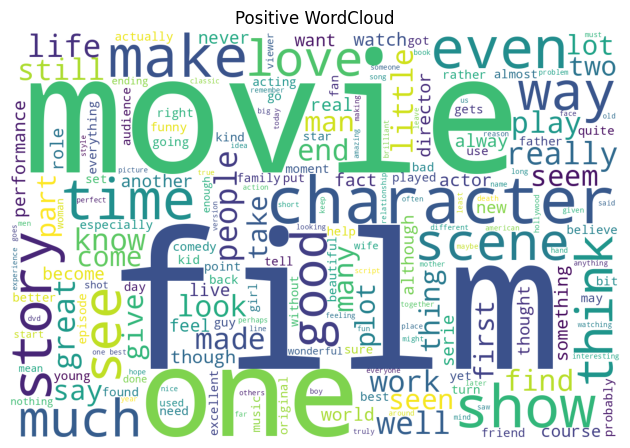

In [26]:
pos_text = " ".join(df[df['sentiment']=="positive"]['review'])
wc = WordCloud(width=1200,height=800,background_color='white').generate(pos_text)

plt.imshow(wc)
plt.axis('off')
plt.title("Positive WordCloud")
plt.tight_layout()
plt.show()


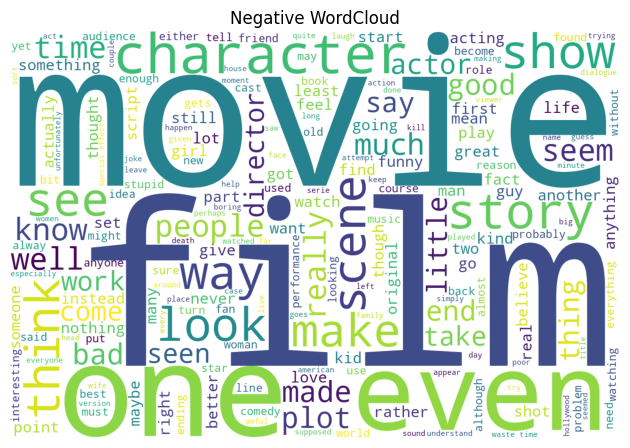

In [27]:
pos_text = " ".join(df[df['sentiment']=="negative"]['review'])
wc = WordCloud(width=1200,height=800,background_color='white').generate(pos_text)

plt.imshow(wc)
plt.axis('off')
plt.title("Negative WordCloud")
plt.tight_layout()
plt.show()


In [28]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [29]:
from nltk.stem import WordNetLemmatizer

lemm = WordNetLemmatizer()

def lemmatize(text):
    new_text = []
    for word in text.split():
        new_text.append(lemm.lemmatize(word))
    return " ".join(new_text)

df['review'] = df['review'].apply(lemmatize) #lemmatization


In [30]:
df['review']

,review
0,one reviewer mentioned watching 1 oz episode h...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically family little boy jake think zombie ...
4,petter matteis love time money visually stunni...
...,...
49995,thought movie right good job creative original...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary school nu...
49998,going disagree previous comment side maltin on...


Text Representation

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
tfidf=TfidfVectorizer(max_features=8000, ngram_range=(1,2))

x=tfidf.fit_transform(df['review']).toarray()

In [33]:
y=df['sentiment']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) #labelEncoding


In [34]:
print(x.shape)
print(y.shape)


(49582, 8000)
(49582,)


In [35]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((39665, 8000), (9917, 8000), (39665,), (9917,))

LOGESTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

lr=LogisticRegression()
lr.fit(x_train,y_train)
LRy_pred=lr.predict(x_test)

print(accuracy_score(y_test,LRy_pred))

0.8879701522637895


Naive Bayes

In [38]:
from sklearn.naive_bayes import MultinomialNB

nb=MultinomialNB()
nb.fit(x_train,y_train)
NBy_pred=nb.predict(x_test)

print(accuracy_score(y_test,NBy_pred))


0.859332459413129


In [39]:
from sklearn.metrics import confusion_matrix
print("By Logistic Regression\n",confusion_matrix(y_test, LRy_pred))
print("By Naive Bayes\n",confusion_matrix(y_test, NBy_pred))


By Logistic Regression
 [[4303  606]
 [ 505 4503]]
By Naive Bayes
 [[4118  791]
 [ 604 4404]]


In [41]:
import pickle

pickle.dump(lr, open("sentiment_model.pkl","wb"))
pickle.dump(tfidf, open("vectorizer.pkl","wb"))


In [46]:
def predict(text):
    text = lemmatize(text)
    vector = tfidf.transform([text]).toarray()
    result = lr.predict(vector)

    if result[0]==1:
        print("Positive")
    else:
        print("Negative")

predict("I thought it would be terrible but it was actually amazing")


Negative
